In [ ]:

#!pip install opencv-python easyocr googletrans


In [2]:
import cv2
import easyocr
from googletrans import Translator
import numpy as np
from PIL import Image

In [3]:
# Load the image
image_path = 'images.jpeg'
image = cv2.imread(image_path)

In [4]:
# Step 1: Original Image
cv2.imshow('Original Image', image)
cv2.waitKey(0)

In [2]:
# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', gray)
cv2.waitKey(0)

# Step 3: Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imshow('Thresholded Image', thresh)
cv2.waitKey(0)

# Step 4: Noise removal using morphological operations
kernel = np.ones((1, 1), np.uint8)
processed_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Noise Removed Image', processed_image)
cv2.waitKey(0)

# Save the processed image for reference
cv2.imwrite('processed_image.jpg', processed_image)

# Step 5: Initialize the EasyOCR reader for Japanese
reader = easyocr.Reader(['ja'])

# Extract text from the processed image
extracted_text = reader.readtext('processed_image.jpg', detail=0)

# Combine extracted text into a single string
extracted_text_str = ' '.join(extracted_text)

# Step 6: Translate the extracted text to English using Googletrans
translator = Translator()
translated_text = translator.translate(extracted_text_str, dest='en')

# Output the results
print("Extracted Text:", extracted_text_str)
print("Translated Text:", translated_text.text)

# Close all OpenCV windows when done
cv2.destroyAllWindows()


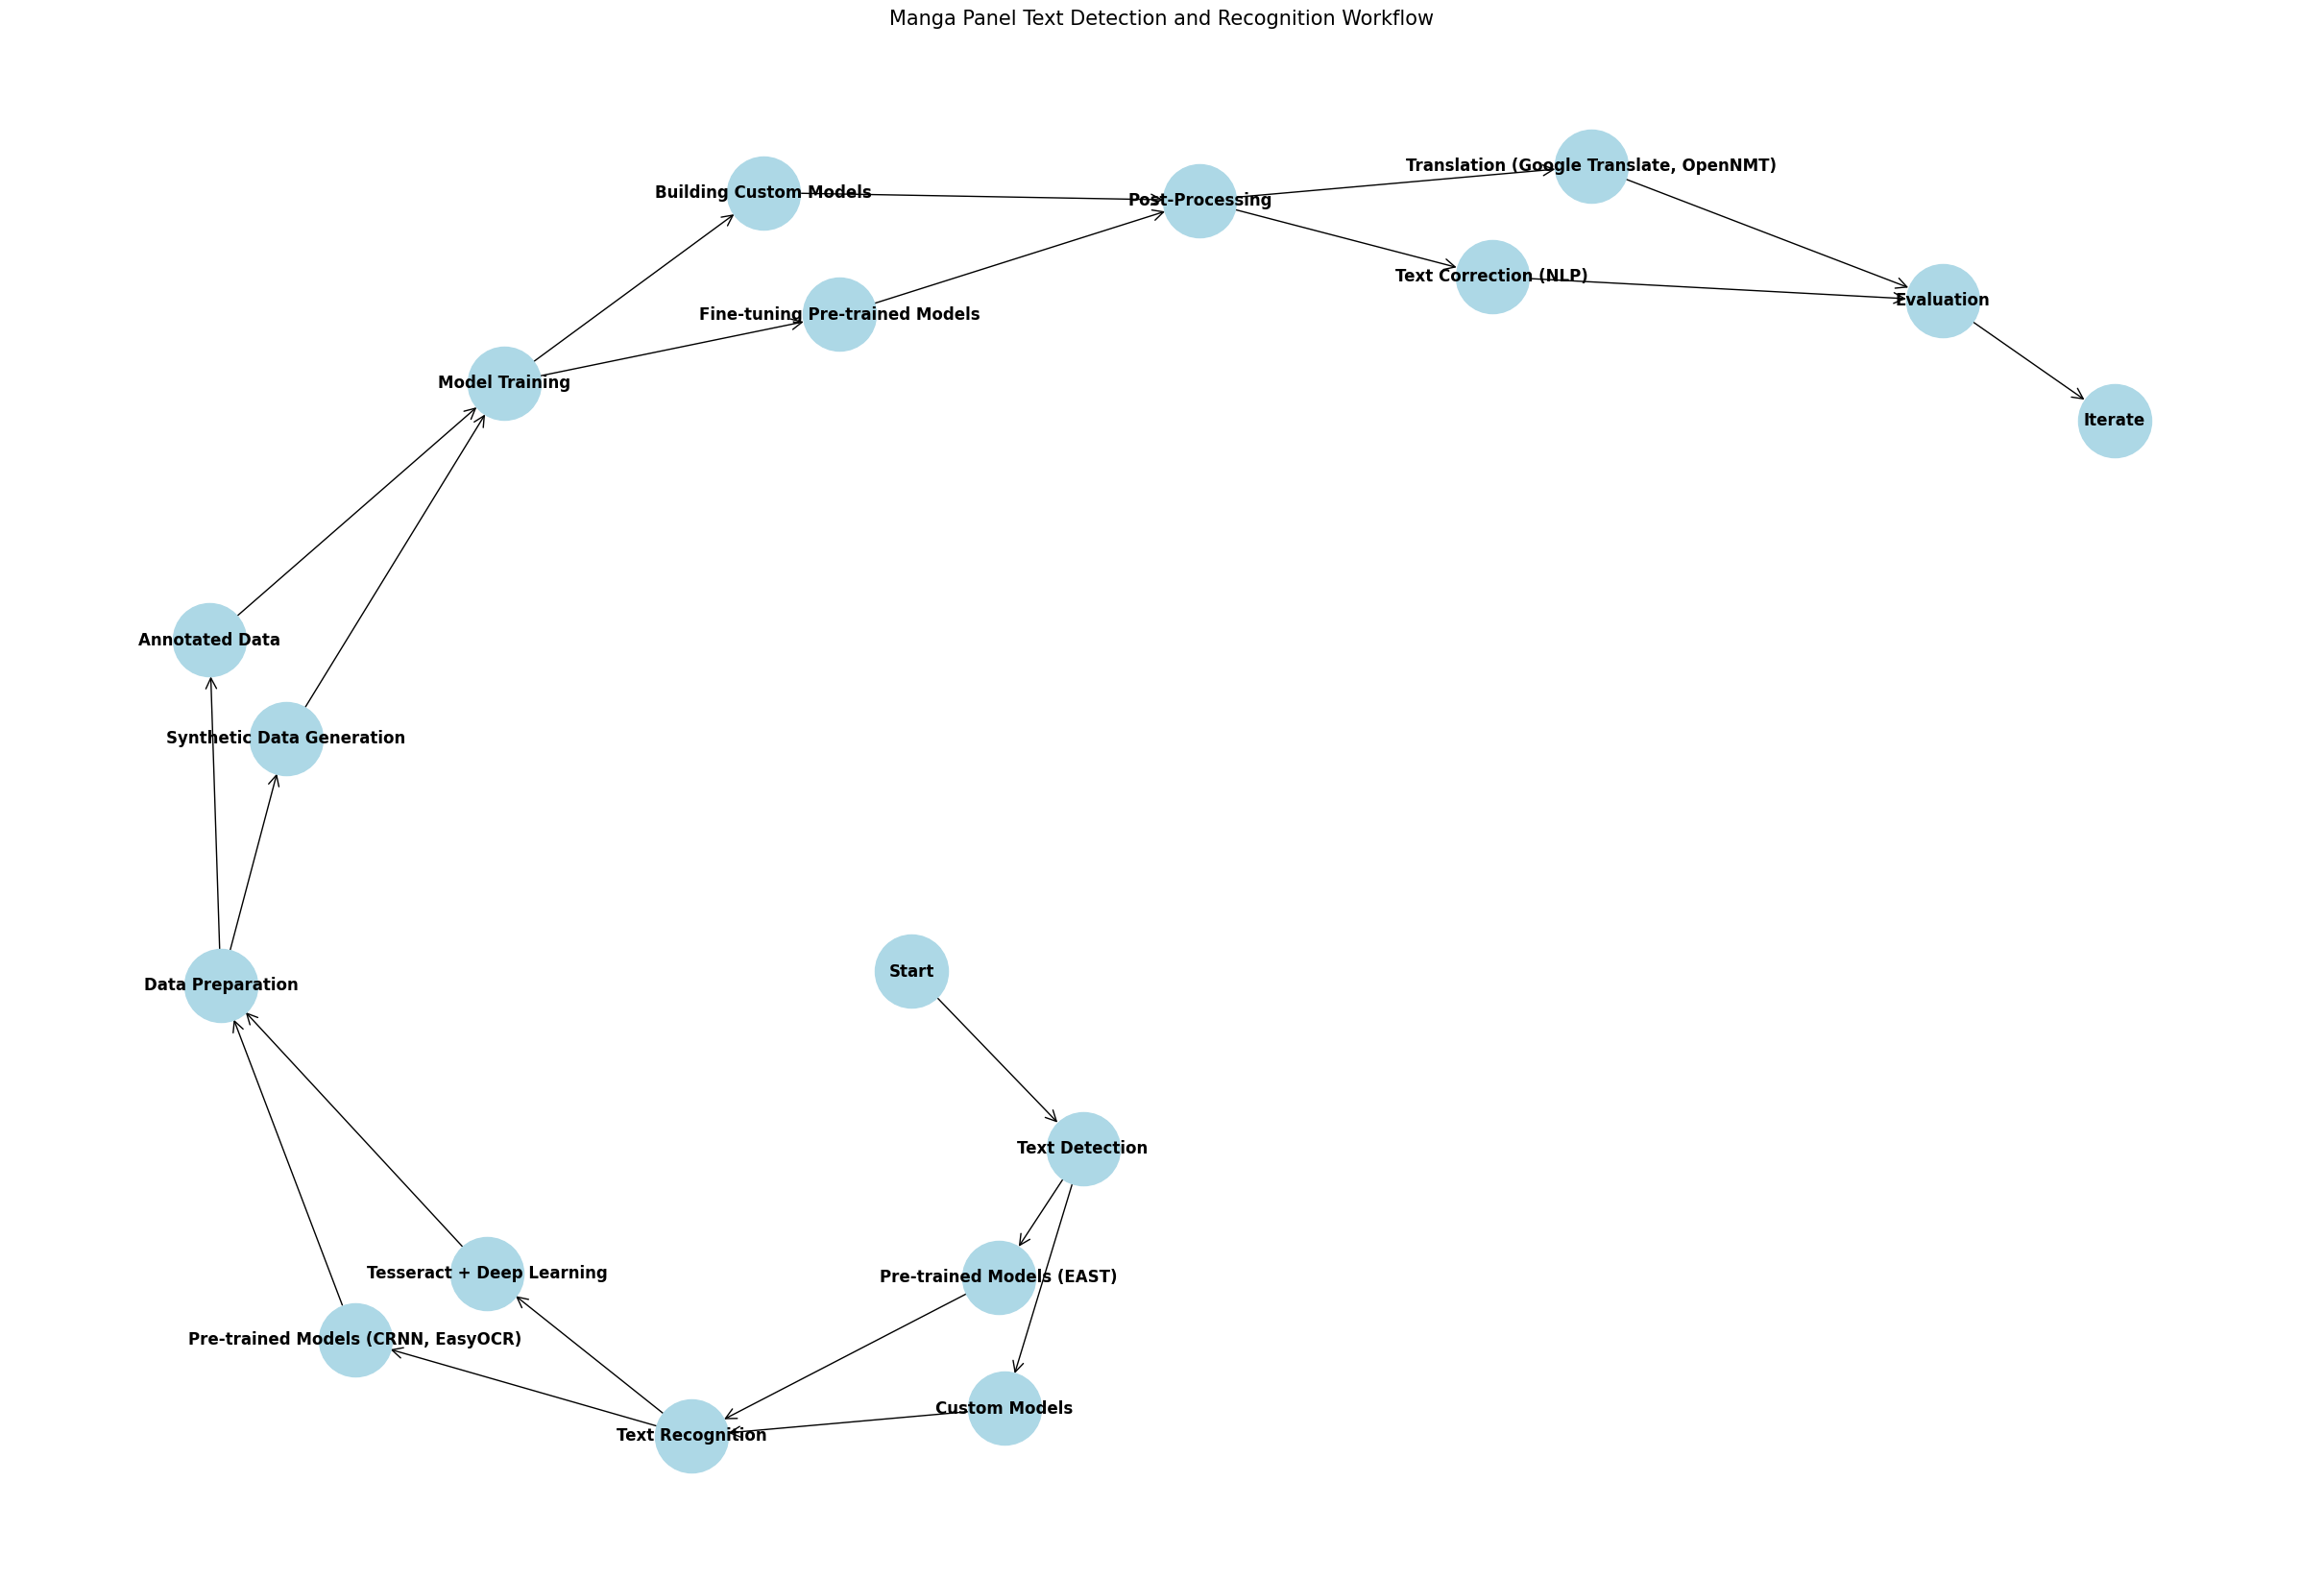

In [4]:

















import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Adding nodes and edges for the manga text detection and recognition workflow
G.add_edges_from([
    ("Start", "Text Detection"),
    ("Text Detection", "Pre-trained Models (EAST)"),
    ("Text Detection", "Custom Models"),
    ("Pre-trained Models (EAST)", "Text Recognition"),
    ("Custom Models", "Text Recognition"),
    ("Text Recognition", "Pre-trained Models (CRNN, EasyOCR)"),
    ("Text Recognition", "Tesseract + Deep Learning"),
    ("Pre-trained Models (CRNN, EasyOCR)", "Data Preparation"),
    ("Tesseract + Deep Learning", "Data Preparation"),
    ("Data Preparation", "Annotated Data"),
    ("Data Preparation", "Synthetic Data Generation"),
    ("Annotated Data", "Model Training"),
    ("Synthetic Data Generation", "Model Training"),
    ("Model Training", "Fine-tuning Pre-trained Models"),
    ("Model Training", "Building Custom Models"),
    ("Fine-tuning Pre-trained Models", "Post-Processing"),
    ("Building Custom Models", "Post-Processing"),
    ("Post-Processing", "Text Correction (NLP)"),
    ("Post-Processing", "Translation (Google Translate, OpenNMT)"),
    ("Text Correction (NLP)", "Evaluation"),
    ("Translation (Google Translate, OpenNMT)", "Evaluation"),
    ("Evaluation", "Iterate")
])

# Define positions for nodes
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(24, 16))

nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=3000, arrows=True, arrowstyle='->', arrowsize=20)

# Show the plot
plt.title("Manga Panel Text Detection and Recognition Workflow", size=15)
plt.show()

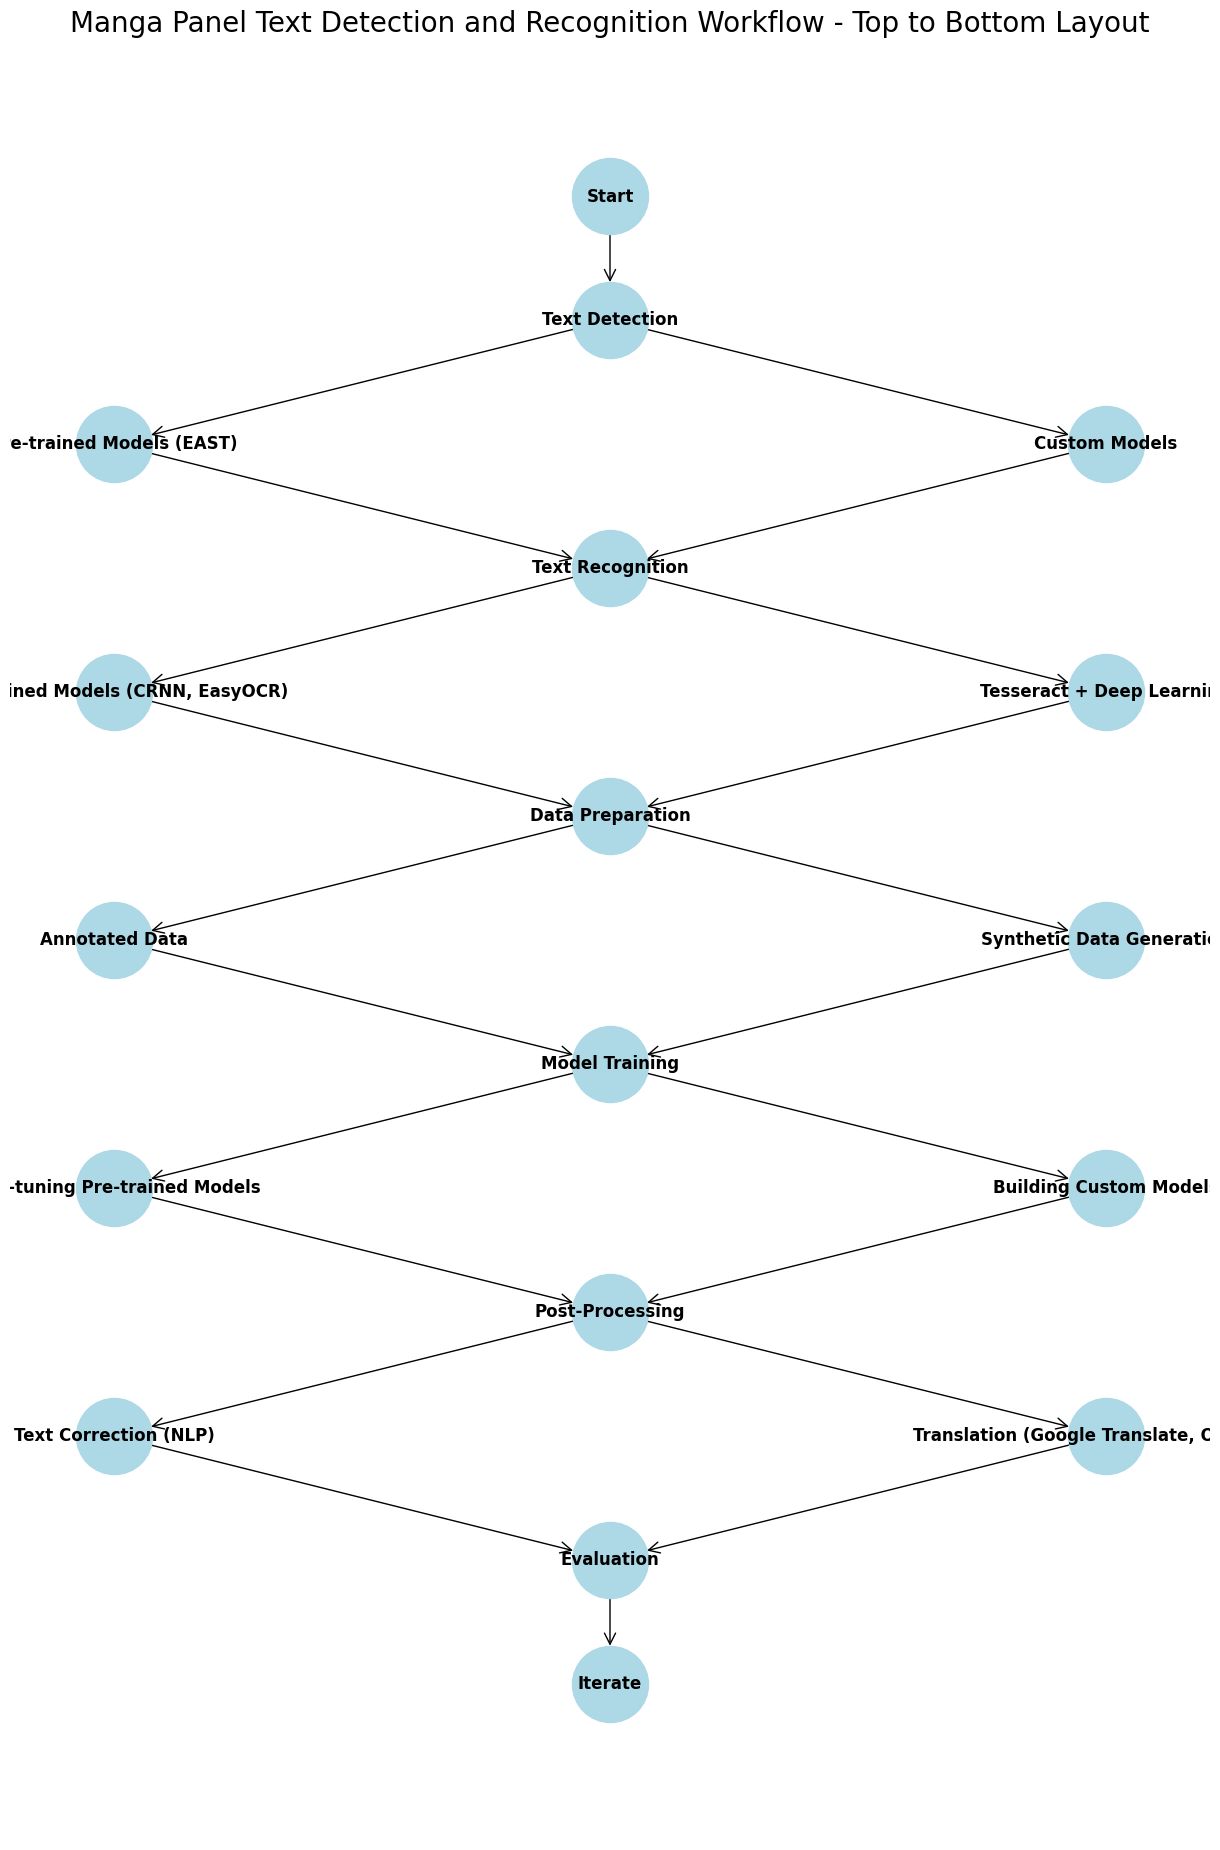

In [5]:
# Define positions for a top-to-bottom layout
pos = {
    "Start": (0, 10),
    "Text Detection": (0, 9),
    "Pre-trained Models (EAST)": (-1, 8),
    "Custom Models": (1, 8),
    "Text Recognition": (0, 7),
    "Pre-trained Models (CRNN, EasyOCR)": (-1, 6),
    "Tesseract + Deep Learning": (1, 6),
    "Data Preparation": (0, 5),
    "Annotated Data": (-1, 4),
    "Synthetic Data Generation": (1, 4),
    "Model Training": (0, 3),
    "Fine-tuning Pre-trained Models": (-1, 2),
    "Building Custom Models": (1, 2),
    "Post-Processing": (0, 1),
    "Text Correction (NLP)": (-1, 0),
    "Translation (Google Translate, OpenNMT)": (1, 0),
    "Evaluation": (0, -1),
    "Iterate": (0, -2),
}

# Increase the size of the graph for better visibility
plt.figure(figsize=(12, 18))

# Draw the graph with the new layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=3000, arrows=True, arrowstyle='->', arrowsize=20)

# Show the plot
plt.title("Manga Panel Text Detection and Recognition Workflow - Top to Bottom Layout", size=20)
plt.show()
